In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns
import statsmodels as sm
import csv


# df_month = pd.read_csv('data/df_month.csv', sep=';', decimal=',')


# df_step_mean = df_month['przyspieszenie'].rolling(window=3, step = None)
# # print("średnią minimalną wg miesiecy:", df_step_mean.min())
# # print("średnia maksymalną wg miesiecy:", df_step_mean.max())
# # print('ogólnie', df_step_mean)


# # ####WYKRES ZE ŚREDNIĄ KROCZĄCĄ
# # plot.figure(figsize = (7,5))
# # plot.scatter(df_month['miesiac'], df_step_mean.min())
# # plot.xlabel('Months')
# # plot.ylabel('Frequency')
# # plot.title("Rozkład średnich miesięcznych")
# # plot.show()
# # Wczytaj istniejący plik CSV
# # with open('data/df_month_step.csv', 'r') as file:
# #     lines = file.readlines()

# df_month_step = pd.read_csv('data/df_month_step.csv', sep=';', decimal=',')

# # string = df_month_step['miesiac'].to_string(index=False)

# miesiace = ['3', '4', '5', '6', '7', '8', '9', '10', '11', '12']

# df_step = pd.DataFrame({'data': miesiace, 'średnia krocząca': df_step_mean, 'przyspieszenie': df_month_step['przyspieszenie']})
# sns.lineplot( x='data', y='przyspieszenie', label='pomiar grawimetryczny')
# sns.lineplot( x='data', y='średnia krocząca', label='średnia krocząca miesięcy')
# plot.xlabel('data')
# plot.ylabel('przyspieszenie')
# plot.legend()
# plot.show()

In [7]:
df_month = pd.read_csv('data/df_minutes.csv', sep=';', decimal=',')

df_step_mean = df_month['przyspieszenie'].rolling(window=3, step = None).sum()
pd.DataFrame(df_step_mean).dropna()
df_step_mean = pd.DataFrame({'przyspieszenie krocząca': df_step_mean}).dropna()
# df_step_mean['miesiac']=df_step_mean.index
df_step_mean

,przyspieszenie krocząca
2,2.018701
3,2.016732
4,2.017588
5,2.016858
6,2.018521
...,...
527035,2.561989
527036,2.561881
527037,2.561869
527038,2.561940


In [8]:
df_month_step=pd.merge(df_step_mean, df_month, left_index=True, right_index=True)
df_month_step

,przyspieszenie krocząca,data,godzina,minuta,raw[nm/s2],cisnienie[mBar],residua,sekunda,miesiac,rok,przyspieszenie,czestotliwosc[Hz],czas
2,2.018701,2020-01-01,0,2,19139.418333,991.305000,19595.245000,149.5,1.0,2020.0,0.672702,0.000004,2020-01-01 00:02:00
3,2.016732,2020-01-01,0,3,19098.785000,991.310167,19556.788333,209.5,1.0,2020.0,0.670737,0.000006,2020-01-01 00:03:00
4,2.017588,2020-01-01,0,4,19163.081667,991.320333,19623.626667,269.5,1.0,2020.0,0.674149,0.000008,2020-01-01 00:04:00
5,2.016858,2020-01-01,0,5,19118.250000,991.324667,19580.930000,329.5,1.0,2020.0,0.671971,0.000009,2020-01-01 00:05:00
6,2.018521,2020-01-01,0,6,19124.246667,991.370833,19589.345000,389.5,1.0,2020.0,0.672401,0.000011,2020-01-01 00:06:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
527035,2.561989,2020-12-31,23,55,22166.720000,968.382667,23492.400000,86129.5,12.0,2020.0,0.854092,0.000009,2020-12-31 23:55:00
527036,2.561881,2020-12-31,23,56,22164.650000,968.363167,23490.150000,86189.5,12.0,2020.0,0.853996,0.000008,2020-12-31 23:56:00
527037,2.561869,2020-12-31,23,57,22159.750000,968.379000,23485.098333,86249.5,12.0,2020.0,0.853781,0.000006,2020-12-31 23:57:00
527038,2.561940,2020-12-31,23,58,22168.871667,968.397833,23494.076667,86309.5,12.0,2020.0,0.854163,0.000004,2020-12-31 23:58:00


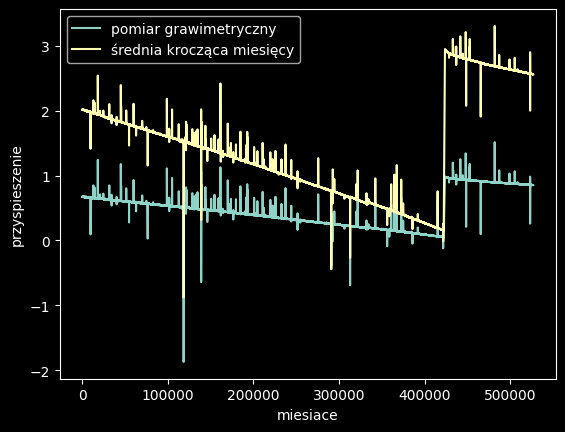

In [9]:
sns.lineplot( x=df_month_step.index, y=df_month_step['przyspieszenie'], label='pomiar grawimetryczny')
sns.lineplot( x=df_month_step.index, y=df_month_step['przyspieszenie krocząca'], label='średnia krocząca miesięcy')
plot.xlabel('miesiace')
plot.ylabel('przyspieszenie')
plot.legend()
plot.show()